In [42]:
from alpaca.statistics.chisquared import get_chi2
from alpaca.statistics.functions import nsigmas
from alpaca import ALPcouplings

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12, 'text.usetex': True, 'font.family': 'serif', 'font.serif': 'Computer Modern Roman'})

In [43]:
transitions = [
    'B+ -> K+ a',
    'B0 -> K*0 a',
    'B+ -> K+ e e',
    'B0 -> K*0 e e',
    'B+ -> K+ mu mu',
    'B0 -> K*0 mu mu',
    'B+ -> K+ gamma gamma',
]

In [44]:
ma = 0.3
fa = 1e3

cu_vec_pos = np.logspace(-4, 0, 100)
ce_vec_pos= np.logspace(-4, 0,100)

cu_pos, ce_pos = np.meshgrid(cu_vec_pos, ce_vec_pos)

# Flatten the meshgrid arrays
cu_flat = cu_pos.flatten()
ce_flat = ce_pos.flatten()

# Create a list to store the ALPcouplings objects
couplings_list = []

# Iterate over the flattened arrays and create ALPcouplings objects
for cu_val, ce_val in zip(cu_flat, ce_flat):
    coupling = ALPcouplings({'cuR': cu_val, 'clL': ce_val}, scale=fa, basis='derivative_above').match_run(5.1, 'VA_below', 'leadinglog') 
    couplings_list.append(coupling)

# Convert the list of couplings back to a numpy array and reshape it to the original meshgrid shape
couplings_array_pos = np.array(couplings_list).reshape(cu_pos.shape)

# Create fa_grid and ma_grid with the same shape as the meshgrid
fa_grid = np.full(cu_pos.shape, fa)
ma_grid = np.full(cu_pos.shape, ma)


In [45]:
chi2_cuce_pos03 = get_chi2(transitions, ma_grid, couplings_array_pos, fa_grid, integrator='no_rge')


/opt/anaconda3/lib/python3.12/site-packages/alpaca/experimental_data/classes.py:219: RuntimeWarning: overflow encountered in scalar power
  self.max_tau = 10**np.max(logtau)


In [46]:
ma = 0.3
fa = 1e3

cu_vec_neg = -np.logspace(-4, 0, 100)
ce_vec_neg = np.logspace(-4, 0, 100)

cu_neg, ce_neg = np.meshgrid(cu_vec_neg, ce_vec_neg)

# Flatten the meshgrid arrays
cu_flat = cu_neg.flatten()
ce_flat = ce_neg.flatten()

# Create a list to store the ALPcouplings objects
couplings_list = []

# Iterate over the flattened arrays and create ALPcouplings objects
for cu_val, ce_val in zip(cu_flat, ce_flat):
    coupling = ALPcouplings({'cuR': cu_val, 'clL': ce_val}, scale=fa, basis='derivative_above').match_run(5.1, 'VA_below', 'leadinglog') 
    couplings_list.append(coupling)

# Convert the list of couplings back to a numpy array and reshape it to the original meshgrid shape
couplings_array_neg = np.array(couplings_list).reshape(cu_neg.shape)

# Create fa_grid and ma_grid with the same shape as the meshgrid
fa_grid = np.full(cu_neg.shape, fa)
ma_grid = np.full(cu_neg.shape, ma)


In [47]:
chi2_cuce_neg03 = get_chi2(transitions, ma_grid, couplings_array_neg, fa_grid, integrator='no_rge')


/opt/anaconda3/lib/python3.12/site-packages/alpaca/experimental_data/classes.py:219: RuntimeWarning: overflow encountered in scalar power
  self.max_tau = 10**np.max(logtau)


Text(0.5, 1.0, '$m_a = 0.3$ GeV, $f_a = 1$ TeV')

<Figure size 960x720 with 0 Axes>

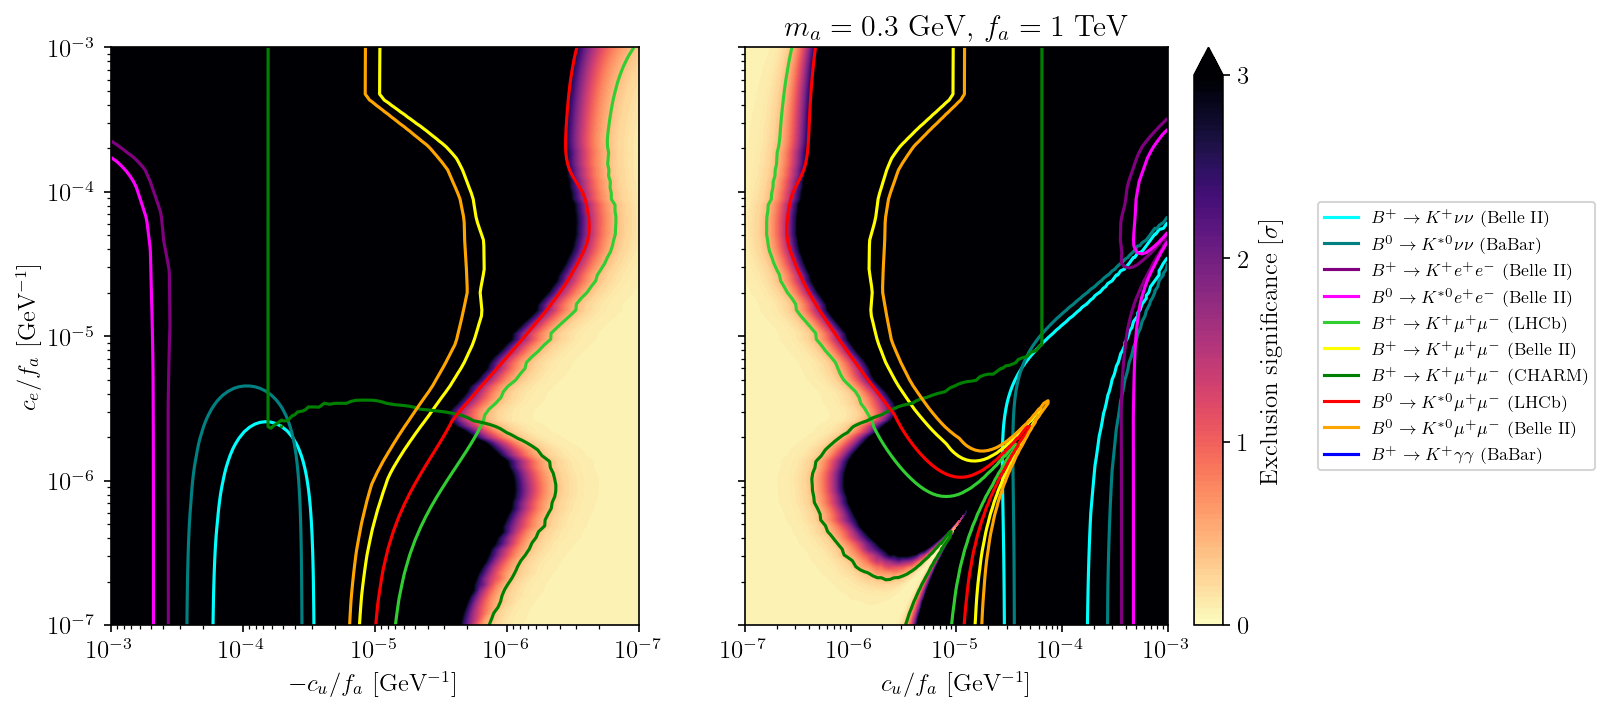

In [53]:
plt.figure(dpi=150)
fig, ax = plt.subplots(1,2,dpi=150, sharey=True, figsize=(10,5))
colors = {('B+ -> K+ a', 'Belle II'): 'cyan', ('B0 -> K*0 a', 'BaBar'): 'teal', ('B+ -> K+ e e', 'Belle II'): 'purple', ('B0 -> K*0 e e', 'Belle II'): 'magenta', ('B+ -> K+ mu mu', 'LHCb'): 'limegreen', ('B+ -> K+ mu mu', 'Belle II'): 'yellow', ('B+ -> K+ mu mu', 'CHARM'): 'green', ('B0 -> K*0 mu mu', 'LHCb'): 'red', ('B0 -> K*0 mu mu', 'Belle II'): 'orange', ('B+ -> K+ gamma gamma', 'BaBar'): 'blue'}
tex = {'B+ -> K+ a': r'$B^+ \to K^+ \nu \nu$', 'B0 -> K*0 a': r'$B^0 \to K^{*0} \nu \nu$', 'B+ -> K+ e e': r'$B^+ \to K^+ e^+ e^-$', 'B0 -> K*0 e e': r'$B^0 \to K^{*0} e^+ e^-$', 'B+ -> K+ mu mu': r'$B^+ \to K^+ \mu^+ \mu^-$', 'B0 -> K*0 mu mu': r'$B^0 \to K^{*0} \mu^+ \mu^-$', 'B+ -> K+ gamma gamma': r'$B^+ \to K^+ \gamma \gamma$'}
legend_elements = []


pl_pos = ax[1].contourf(cu_pos/fa, ce_pos/fa, nsigmas(np.real(chi2_cuce_pos03[('', 'Global')]),2), levels=list(np.linspace(0, 3, 100)), cmap='magma_r', vmax=3, extend='max')
for observable, chi2_obs in chi2_cuce_pos03.items():
    if observable == ('', 'Global'):
        break
    ax[1].contour(cu_pos/fa, ce_pos/fa, nsigmas(np.real(chi2_obs), 2), levels=[2], colors = colors[observable])
    legend_elements.append(plt.Line2D([0], [0], color=colors[observable], label=tex[observable[0]] + ' (' + observable[1] + ')'))

pl_neg = ax[0].contourf(-cu_neg/fa, ce_neg/fa, nsigmas(np.real(chi2_cuce_neg03[('', 'Global')]),2), levels=list(np.linspace(0, 3, 100)), cmap='magma_r', vmax=3, extend='max')
for observable, chi2_obs in chi2_cuce_neg03.items():
    if observable == ('', 'Global'):
        break
    ax[0].contour(-cu_neg/fa, ce_neg/fa, nsigmas(np.real(chi2_obs), 2), levels=[2], colors = colors[observable])
    # legend_elements.append(plt.Line2D([0], [0], color=colors[observable], label=tex[observable[0]] + ' (' + observable[1] + ')'))

for i in ax:
    i.set_xscale('log')
    i.set_yscale('log')

ax[0].invert_xaxis()

ax[0].set_xlabel(r'$-c_u/f_a$ [GeV$^{-1}$]')
ax[1].set_xlabel(r'$c_u/f_a$ [GeV$^{-1}$]')
ax[0].set_ylabel(r'$c_e/f_a$ [GeV$^{-1}$]')
cb = plt.colorbar(pl_pos, extend='max')
cb.set_label(r'Exclusion significance [$\sigma$]')
cb.set_ticks([0, 1, 2, 3])
plt.legend(handles = legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=9, fontsize=8)
plt.title(r'$m_a = 0.3$ GeV, $f_a = 1$ TeV')

In [ ]:
ma = 0.3
fa = 1e3

cu_vec_pos2 = np.logspace(-4, 0, 100)
cd_vec_pos2  = np.logspace(-4, 0, 100)

cu_pos2 , cd_pos2  = np.meshgrid(cu_vec_pos2 , cd_vec_pos2 )

# Flatten the meshgrid arrays
cu_flat_pos2  = cu_pos2.flatten()
cd_flat_pos2  = cd_pos2.flatten()

# Create a list to store the ALPcouplings objects
couplings_list = []

# Iterate over the flattened arrays and create ALPcouplings objects
for cu_val, cd_val in zip(cu_flat_pos2 , cd_flat_pos2 ):
    coupling = ALPcouplings({'cuR': cu_val, 'cdR': cd_val}, scale=fa, basis='derivative_above').match_run(5.1, 'VA_below', 'leadinglog') 
    couplings_list.append(coupling)

# Convert the list of couplings back to a numpy array and reshape it to the original meshgrid shape
couplings_array_pos2  = np.array(couplings_list).reshape(cu_pos2.shape)

# Create fa_grid and ma_grid with the same shape as the meshgrid
fa_grid = np.full(cu_pos .shape, fa)
ma_grid = np.full(cu_pos .shape, ma)


In [ ]:
transitions = [
    'B+ -> K+ a',
    'B0 -> K*0 a',
    'B+ -> K+ e e',
    'B0 -> K*0 e e',
    'B+ -> K+ mu mu',
    'B0 -> K*0 mu mu',
    'B+ -> K+ gamma gamma',
]

In [ ]:
chi2_cucd_pos2 = get_chi2(transitions, ma_grid, couplings_array_pos2, fa_grid, integrator='no_rge')


/opt/anaconda3/lib/python3.12/site-packages/alpaca/experimental_data/classes.py:219: RuntimeWarning: overflow encountered in scalar power
  self.max_tau = 10**np.max(logtau)


In [ ]:
ma = 0.3
fa = 1e3

cu_vec_neg2 = -np.logspace(-4, 0, 100)
cd_vec_neg2  = np.logspace(-4, 0, 100)

cu_neg2 , cd_neg2  = np.meshgrid(cu_vec_neg2 , cd_vec_neg2 )

# Flatten the meshgrid arrays
cu_flat_neg2  = cu_neg2.flatten()
cd_flat_neg2  = cd_neg2.flatten()

# Create a list to store the ALPcouplings objects
couplings_list = []

# Iterate over the flattened arrays and create ALPcouplings objects
for cu_val, cd_val in zip(cu_flat_neg2 , cd_flat_neg2 ):
    coupling = ALPcouplings({'cuR': cu_val, 'cdR': cd_val}, scale=fa, basis='derivative_above').match_run(5.1, 'VA_below', 'leadinglog') 
    couplings_list.append(coupling)

# Convert the list of couplings back to a numpy array and reshape it to the original meshgrid shape
couplings_array_neg2  = np.array(couplings_list).reshape(cu_neg2.shape)

# Create fa_grid and ma_grid with the same shape as the meshgrid
fa_grid = np.full(cu_neg2 .shape, fa)
ma_grid = np.full(cu_neg2 .shape, ma)


In [ ]:
chi2_cucd_neg2 = get_chi2(transitions, ma_grid, couplings_array_neg2, fa_grid, integrator='no_rge')


Text(0.5, 1.0, '$m_a = 0.3$ GeV, $f_a = 1$ TeV')

<Figure size 960x720 with 0 Axes>

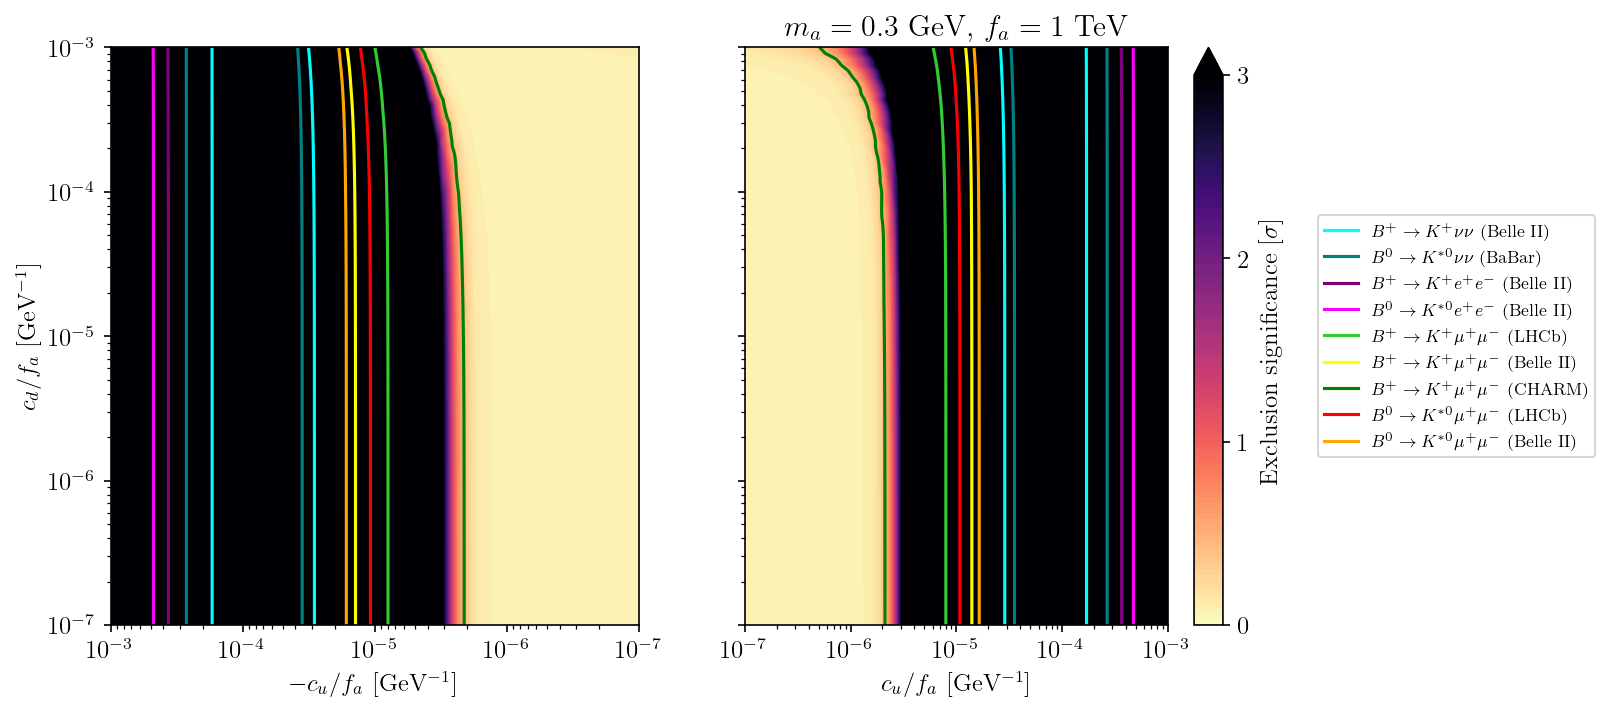

In [ ]:
plt.figure(dpi=150)
fig, ax = plt.subplots(1,2,dpi=150, sharey=True, figsize=(10,5))
colors = {('B+ -> K+ a', 'Belle II'): 'cyan', ('B0 -> K*0 a', 'BaBar'): 'teal', ('B+ -> K+ e e', 'Belle II'): 'purple', ('B0 -> K*0 e e', 'Belle II'): 'magenta', ('B+ -> K+ mu mu', 'LHCb'): 'limegreen', ('B+ -> K+ mu mu', 'Belle II'): 'yellow', ('B+ -> K+ mu mu', 'CHARM'): 'green', ('B0 -> K*0 mu mu', 'LHCb'): 'red', ('B0 -> K*0 mu mu', 'Belle II'): 'orange'}
tex = {'B+ -> K+ a': r'$B^+ \to K^+ \nu \nu$', 'B0 -> K*0 a': r'$B^0 \to K^{*0} \nu \nu$', 'B+ -> K+ e e': r'$B^+ \to K^+ e^+ e^-$', 'B0 -> K*0 e e': r'$B^0 \to K^{*0} e^+ e^-$', 'B+ -> K+ mu mu': r'$B^+ \to K^+ \mu^+ \mu^-$', 'B0 -> K*0 mu mu': r'$B^0 \to K^{*0} \mu^+ \mu^-$'}
legend_elements = []


pl_pos_cucd = ax[1].contourf(cu_pos2/fa, cd_pos2/fa, nsigmas(np.real(chi2_cucd_pos2[('', 'Global')]),2), levels=list(np.linspace(0, 3, 100)), cmap='magma_r', vmax=3, extend='max')
for observable, chi2_obs in chi2_cucd_pos2.items():
    if observable == ('', 'Global'):
        break
    ax[1].contour(cu_pos2/fa, cd_pos2/fa, nsigmas(np.real(chi2_obs), 2), levels=[2], colors = colors[observable])
    legend_elements.append(plt.Line2D([0], [0], color=colors[observable], label=tex[observable[0]] + ' (' + observable[1] + ')'))

pl_neg2 = ax[0].contourf(-cu_neg2/fa, cd_neg2/fa, nsigmas(np.real(chi2_cucd_neg2[('', 'Global')]),2), levels=list(np.linspace(0, 3, 100)), cmap='magma_r', vmax=3, extend='max')
for observable, chi2_obs in chi2_cucd_neg2.items():
    if observable == ('', 'Global'):
        break
    ax[0].contour(-cu_neg2/fa, cd_neg2/fa, nsigmas(np.real(chi2_obs), 2), levels=[2], colors = colors[observable])
    # legend_elements.append(plt.Line2D([0], [0], color=colors[observable], label=tex[observable[0]] + ' (' + observable[1] + ')'))

for i in ax:
    i.set_xscale('log')
    i.set_yscale('log')

ax[0].invert_xaxis()

ax[0].set_xlabel(r'$-c_u/f_a$ [GeV$^{-1}$]')
ax[1].set_xlabel(r'$c_u/f_a$ [GeV$^{-1}$]')
ax[0].set_ylabel(r'$c_d/f_a$ [GeV$^{-1}$]')
cb = plt.colorbar(pl_pos_cucd, extend='max')
cb.set_label(r'Exclusion significance [$\sigma$]')
cb.set_ticks([0, 1, 2, 3])
plt.legend(handles = legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=9, fontsize=8)
plt.title(r'$m_a = 0.3$ GeV, $f_a = 1$ TeV')

In [ ]:
ma = 0.3
fa = 1e3

cu_vec_pos = np.logspace(-4, 0, 100)
cB_vec_pos= np.logspace(-4, 0,100)

cu_pos, cB_pos = np.meshgrid(cu_vec_pos, cB_vec_pos)

# Flatten the meshgrid arrays
cu_flat = cu_pos.flatten()
cB_flat = cB_pos.flatten()

# Create a list to store the ALPcouplings objects
couplings_list = []

# Iterate over the flattened arrays and create ALPcouplings objects
for cu_val, cB_val in zip(cu_flat, cB_flat):
    coupling = ALPcouplings({'cuR': cu_val, 'cB': cB_val}, scale=fa, basis='derivative_above').match_run(5.1, 'VA_below', 'leadinglog') 
    couplings_list.append(coupling)

# Convert the list of couplings back to a numpy array and reshape it to the original meshgrid shape
couplings_array_cucB_pos = np.array(couplings_list).reshape(cu_pos.shape)

# Create fa_grid and ma_grid with the same shape as the meshgrid
fa_grid = np.full(cu_pos.shape, fa)
ma_grid = np.full(cu_pos.shape, ma)


In [ ]:
chi2_cucB_pos03 = get_chi2(transitions, ma_grid, couplings_array_cucB_pos, fa_grid, integrator='no_rge')


/opt/anaconda3/lib/python3.12/site-packages/alpaca/experimental_data/classes.py:219: RuntimeWarning: overflow encountered in scalar power
  self.max_tau = 10**np.max(logtau)


In [56]:
ma = 0.3
fa = 1e3

cu_vec_neg = -np.logspace(-4, 0, 100)
cB_vec_neg = np.logspace(-4, 0, 100)

cu_neg, cB_neg = np.meshgrid(cu_vec_neg, cB_vec_neg)

# Flatten the meshgrid arrays
cu_flat = cu_neg.flatten()
cB_flat = cB_neg.flatten()

# Create a list to store the ALPcouplings objects
couplings_list = []

# Iterate over the flattened arrays and create ALPcouplings objects
for cu_val, ce_val in zip(cu_flat, cB_flat):
    coupling = ALPcouplings({'cuR': cu_val, 'cB': cB_val}, scale=fa, basis='derivative_above').match_run(5.1, 'VA_below', 'leadinglog') 
    couplings_list.append(coupling)

# Convert the list of couplings back to a numpy array and reshape it to the original meshgrid shape
couplings_array_cucB_neg = np.array(couplings_list).reshape(cu_neg.shape)

# Create fa_grid and ma_grid with the same shape as the meshgrid
fa_grid = np.full(cu_neg.shape, fa)
ma_grid = np.full(cu_neg.shape, ma)


In [57]:
chi2_cucB_neg03 = get_chi2(transitions, ma_grid, couplings_array_cucB_neg, fa_grid, integrator='no_rge')


/opt/anaconda3/lib/python3.12/site-packages/alpaca/experimental_data/classes.py:219: RuntimeWarning: overflow encountered in scalar power
  self.max_tau = 10**np.max(logtau)


Text(0.5, 1.0, '$m_a = 0.3$ GeV, $f_a = 1$ TeV')

<Figure size 960x720 with 0 Axes>

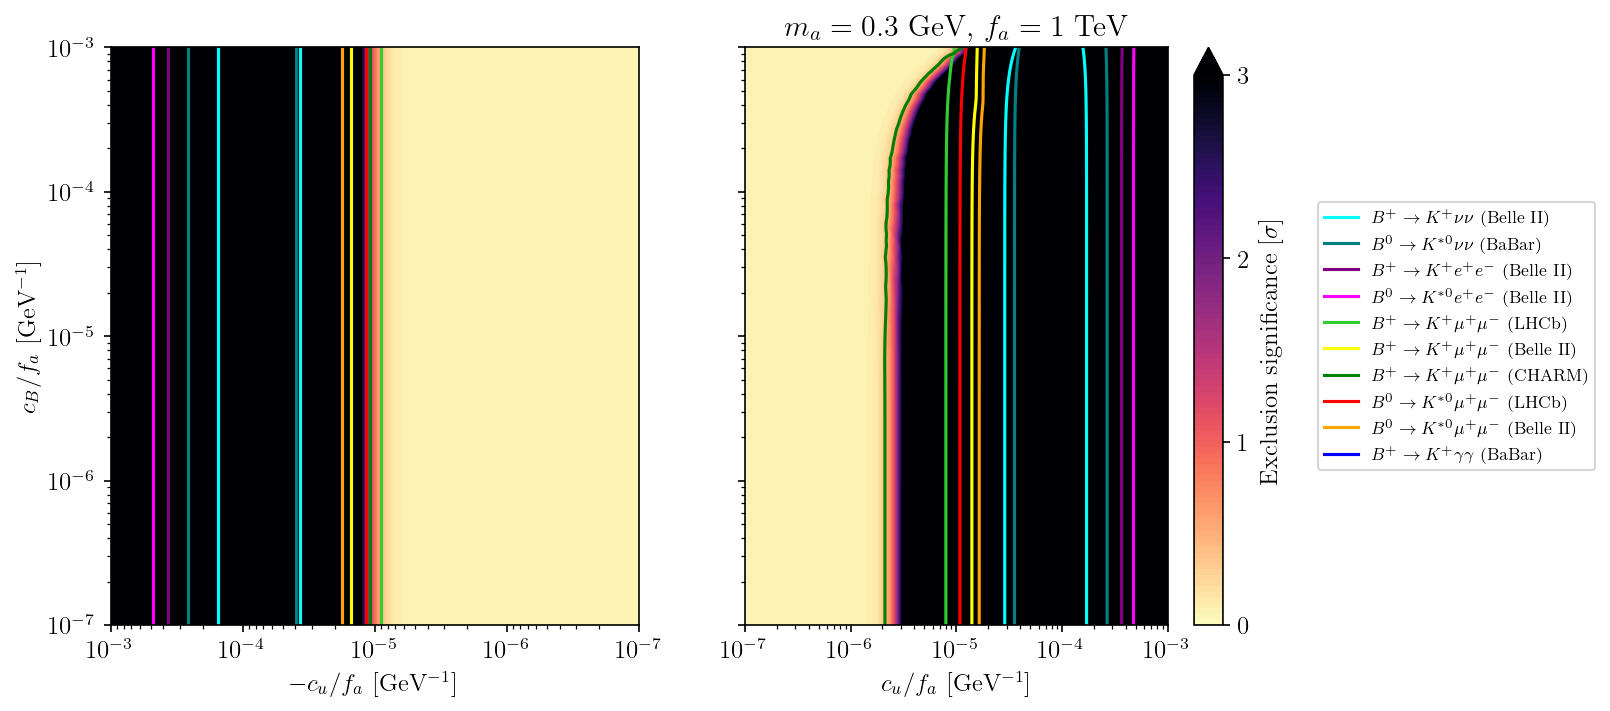

In [58]:
plt.figure(dpi=150)
fig, ax = plt.subplots(1,2,dpi=150, sharey=True, figsize=(10,5))
colors = {('B+ -> K+ a', 'Belle II'): 'cyan', ('B0 -> K*0 a', 'BaBar'): 'teal', ('B+ -> K+ e e', 'Belle II'): 'purple', ('B0 -> K*0 e e', 'Belle II'): 'magenta', ('B+ -> K+ mu mu', 'LHCb'): 'limegreen', ('B+ -> K+ mu mu', 'Belle II'): 'yellow', ('B+ -> K+ mu mu', 'CHARM'): 'green', ('B0 -> K*0 mu mu', 'LHCb'): 'red', ('B0 -> K*0 mu mu', 'Belle II'): 'orange', ('B+ -> K+ gamma gamma', 'BaBar'): 'blue'}
tex = {'B+ -> K+ a': r'$B^+ \to K^+ \nu \nu$', 'B0 -> K*0 a': r'$B^0 \to K^{*0} \nu \nu$', 'B+ -> K+ e e': r'$B^+ \to K^+ e^+ e^-$', 'B0 -> K*0 e e': r'$B^0 \to K^{*0} e^+ e^-$', 'B+ -> K+ mu mu': r'$B^+ \to K^+ \mu^+ \mu^-$', 'B0 -> K*0 mu mu': r'$B^0 \to K^{*0} \mu^+ \mu^-$', 'B+ -> K+ gamma gamma': r'$B^+ \to K^+ \gamma \gamma$'}
legend_elements = []


pl_pos = ax[1].contourf(cu_pos/fa, cB_pos/fa, nsigmas(np.real(chi2_cucB_pos03[('', 'Global')]),2), levels=list(np.linspace(0, 3, 100)), cmap='magma_r', vmax=3, extend='max')
for observable, chi2_obs in chi2_cucB_pos03.items():
    if observable == ('', 'Global'):
        break
    ax[1].contour(cu_pos/fa, cB_pos/fa, nsigmas(np.real(chi2_obs), 2), levels=[2], colors = colors[observable])
    legend_elements.append(plt.Line2D([0], [0], color=colors[observable], label=tex[observable[0]] + ' (' + observable[1] + ')'))

pl_neg = ax[0].contourf(-cu_neg/fa, cB_neg/fa, nsigmas(np.real(chi2_cucB_neg03[('', 'Global')]),2), levels=list(np.linspace(0, 3, 100)), cmap='magma_r', vmax=3, extend='max')
for observable, chi2_obs in chi2_cucB_neg03.items():
    if observable == ('', 'Global'):
        break
    ax[0].contour(-cu_neg/fa, cB_neg/fa, nsigmas(np.real(chi2_obs), 2), levels=[2], colors = colors[observable])
    # legend_elements.append(plt.Line2D([0], [0], color=colors[observable], label=tex[observable[0]] + ' (' + observable[1] + ')'))

for i in ax:
    i.set_xscale('log')
    i.set_yscale('log')

ax[0].invert_xaxis()

ax[0].set_xlabel(r'$-c_u/f_a$ [GeV$^{-1}$]')
ax[1].set_xlabel(r'$c_u/f_a$ [GeV$^{-1}$]')
ax[0].set_ylabel(r'$c_B/f_a$ [GeV$^{-1}$]')
cb = plt.colorbar(pl_pos, extend='max')
cb.set_label(r'Exclusion significance [$\sigma$]')
cb.set_ticks([0, 1, 2, 3])
plt.legend(handles = legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=9, fontsize=8)
plt.title(r'$m_a = 0.3$ GeV, $f_a = 1$ TeV')

In [68]:
print(couplings_array_cBcu_pos[0,0].values)

{'cuV': matrix([[ 9.28410511e-05-1.73266589e-22j,
         -1.22099908e-25-4.83556880e-28j],
        [-1.22099908e-25+4.83556880e-28j,
          9.28410363e-05-1.73269259e-22j]]), 'cuA': matrix([[9.45498097e-05-1.77953339e-22j, 1.22749900e-25-2.47253907e-28j],
        [1.22749900e-25+2.47253907e-28j, 9.45497653e-05-1.77952973e-22j]]), 'cdV': matrix([[ 7.66513519e-06+1.72223109e-22j,
         -2.82856856e-10-1.17862168e-10j,
          6.79764813e-09+2.71648715e-09j],
        [-2.82856856e-10+1.17862168e-10j,
          7.66646590e-06+1.72265216e-22j,
         -3.33801134e-08+6.25244102e-10j],
        [ 6.79764813e-09-2.71648715e-09j,
         -3.33801134e-08-6.25244102e-10j,
          8.47047341e-06+1.97630884e-22j]]), 'cdA': matrix([[ 4.29872908e-06+1.77940337e-22j,
          2.82856856e-10+1.17862168e-10j,
         -6.79764813e-09-2.71648715e-09j],
        [ 2.82856856e-10-1.17862168e-10j,
          4.29739837e-06+1.77898230e-22j,
          3.33801134e-08-6.25244102e-10j],
        [-6.